In [1]:
from qutip import *
import math as math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import scipy as scipy
import matplotlib.animation as animation
from tqdm import tqdm
import sys
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import os

In [2]:
N = 300
g_0 = 1
n_q = 500 # Photon saturation number
C = np.linspace(1e-15,2,200) # Cooperativity
k = g_0*np.sqrt(2/(C*n_q)) # Photon loss
P = 2*n_q*k # Pumping

In [3]:
g = basis(2,0)
e = basis(2,1)
sigma = tensor(identity(N),g*e.dag())
a = tensor(destroy(N),identity(2))
H = g_0*(a.dag()*sigma+a*sigma.dag())

In [4]:
n_a = np.zeros(np.size(C))
result = []
L = []
for i in tqdm(range(np.size(C))):    
    coll1 = np.sqrt(P[i])*sigma.dag()
    coll2 = np.sqrt(k[i])*a
    result.append(steadystate(H, [coll1,coll2]))
    n_a[i] = expect(a.dag()*a,result[i])
    L.append(liouvillian(H, [coll1,coll2]))

100%|██████████| 200/200 [02:13<00:00,  1.50it/s]


Text(0, 0.5, 'n')

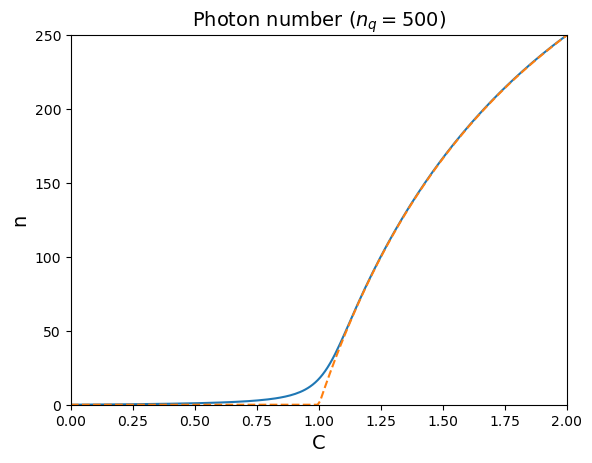

In [5]:
plt.plot(C,n_a)
plt.plot(C,np.heaviside(C-1,0)*n_q*(1-1/C),'--')
plt.xlim([np.min(C),np.max(C)])
plt.ylim([np.min(n_a),np.max(n_a)])
plt.title('Photon number ($n_q=$'+str(n_q)+')',fontsize=14)
plt.xlabel('C',fontsize=14)
plt.ylabel('n',fontsize=14)

In [6]:
wig_xvec = np.linspace(-19,19,150)
wig_pvec = np.linspace(-19,19,150)
Wigner = wigner(result[120].ptrace(0),wig_xvec,wig_pvec)

Text(0, 0.5, 'p')

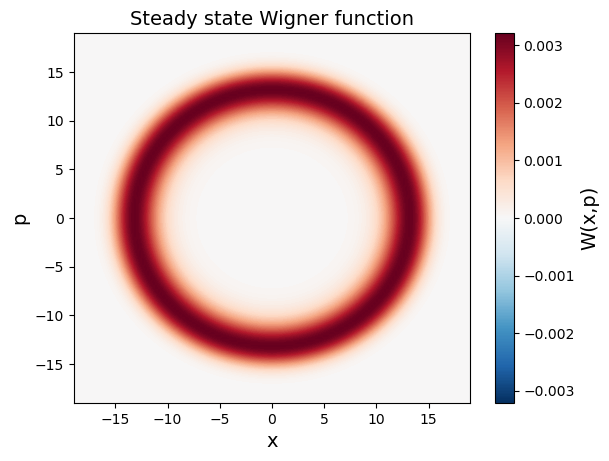

In [7]:
nrm = mpl.colors.Normalize(-Wigner.max(),Wigner.max())
cbar = plt.colorbar(cm.ScalarMappable(norm=nrm, cmap=cm.RdBu_r))
cbar.set_label('W(x,p)',fontsize=14)
plt.contourf(wig_xvec, wig_pvec, Wigner, 100, cmap=cm.RdBu_r, norm=nrm)
plt.xlim([np.min(wig_xvec),np.max(wig_xvec)])
plt.ylim([np.min(wig_pvec),np.max(wig_pvec)])
plt.title('Steady state Wigner function',fontsize=14)
plt.xlabel('x',fontsize=14)
plt.ylabel('p',fontsize=14)

In [8]:
tvec = np.linspace(0,10/k[np.size(k)-1],200)
corr = correlation_2op_1t(H, None, tvec, [coll1,coll2], a.dag(), a)
wlist, spec = spectrum_correlation_fft(tvec,corr)

Text(0.5, 0, '$\\omega$')

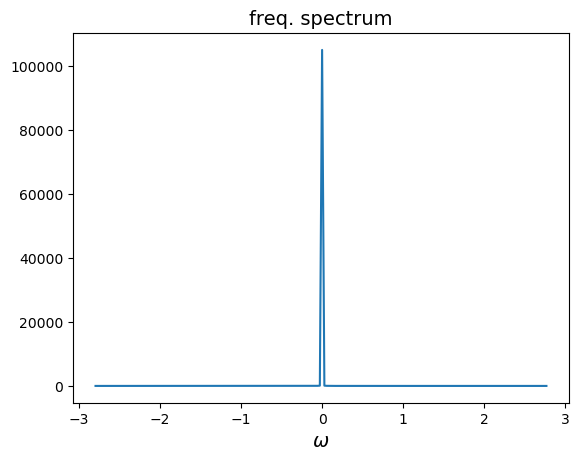

In [9]:
plt.plot(wlist,spec)
plt.title('freq. spectrum',fontsize=14)
plt.xlabel('$\omega$',fontsize=14)

In [10]:
corr2 = correlation_3op_1t(H, None, tvec, [coll1,coll2], a.dag(), a.dag()*a, a)
n = mesolve(H, result[np.size(C)-1], tvec, [coll1,coll2], [a.dag()*a]).expect[0]
corr_2f = corr2/(n[0]*n[np.size(tvec)-1])

c:\Users\rodri\anaconda3\envs\QuantumChaos\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Second order coherence function')

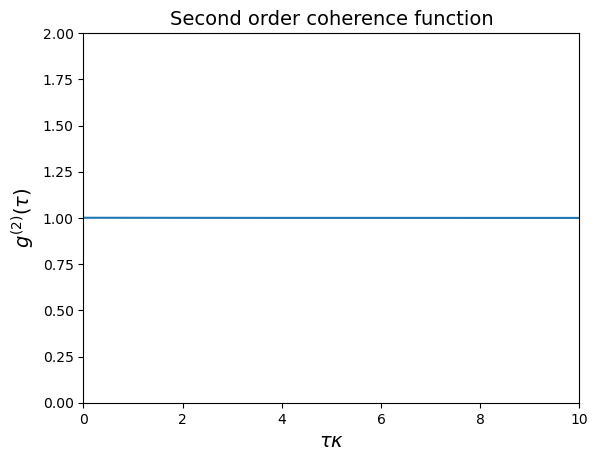

In [14]:
plt.plot(tvec*k[np.size(k)-1],corr_2f)
plt.ylim([0,2])
plt.xlim(min(tvec*k[np.size(k)-1]),max(tvec*k[np.size(k)-1]))
plt.xlabel(r'$\tau\kappa$',fontsize=14)
plt.ylabel(r'$g^{(2)}(\tau)$',fontsize=14)
plt.title('Second order coherence function',fontsize=14)